In [71]:
import pandas as pd
import numpy as np
import json 
import copy
import csv
import os
import re
import nltk
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import nltk
from nltk.corpus import stopwords
import sklearn
import numpy as np
import pandas as pd
from pandas import DataFrame

In [72]:
data = [] 
LV_bar = pd.read_csv('LVbars_Business_withStars.csv')


In [73]:
time_df=LV_bar[['business_id','stars','SaturdayOPEN','SaturdayCOLSED']]

In [74]:
time_df

,business_id,stars,SaturdayOPEN,SaturdayCOLSED
0,91868,3.890909,19:30,03:00
1,143668,4.301587,10:00,21:00
2,79854,4.666667,NaN,NaN
3,87650,4.666667,00:00,00:00
4,33029,2.312500,NaN,NaN
5,11250,3.785714,09:00,18:00
6,185658,4.117021,00:00,00:00
7,63838,3.375000,NaN,NaN
8,184144,3.136364,NaN,NaN
9,29618,3.000000,NaN,NaN


In [75]:
#time_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [76]:
df=time_df
score_range=[]
count=[0,0,0,0,0]
for i in range(len(df)):
    if (df['stars'][i]<=1.0) & (df['stars'][i]>=0.0):
        score_range.append('0-1')
        count[0]=count[0]+1
    elif (df['stars'][i]<=2.0) & (df['stars'][i]>1.0):
        score_range.append('1-2')
        count[1]=count[1]+1
    elif (df['stars'][i]<=3.0) & (df['stars'][i]>2.0):
        score_range.append('2-3')
        count[2]=count[2]+1
    elif (df['stars'][i]<=4.0) & (df['stars'][i]>3.0):
        score_range.append('3-4')
        count[3]=count[3]+1
    else:
        score_range.append('4-5')
        count[4]=count[4]+1


In [77]:
count

[2, 21, 179, 623, 376]

In [78]:
'''
df['score_range']=score_range
'''

"\ndf['score_range']=score_range\n"

In [79]:
'''
range=['0.5','1.5','2.5','3.5','4.5']
'''

"\nrange=['0.5','1.5','2.5','3.5','4.5']\n"

In [80]:
import seaborn 

In [81]:
'''
df_100=df.loc[(df['count'] >=100),:]
'''

"\ndf_100=df.loc[(df['count'] >=100),:]\n"

In [82]:
'''
seaborn.distplot(df_100['score'],bins=[x for x in np.arange(1.5,5.0,0.2)],kde=False,rug=True,color="g")
'''

'\nseaborn.distplot(df_100[\'score\'],bins=[x for x in np.arange(1.5,5.0,0.2)],kde=False,rug=True,color="g")\n'

In [83]:
'''
seaborn.scatterplot(x='score', y='count', data=df_100)
'''

"\nseaborn.scatterplot(x='score', y='count', data=df_100)\n"

In [84]:
'''
LV_bar.loc[LV_bar['BikeParking']=='TRUE',:]
'''

"\nLV_bar.loc[LV_bar['BikeParking']=='TRUE',:]\n"

In [85]:
'''
LV_bar.loc[LV_bar['BikeParking']=='FALSE',:]
'''

"\nLV_bar.loc[LV_bar['BikeParking']=='FALSE',:]\n"

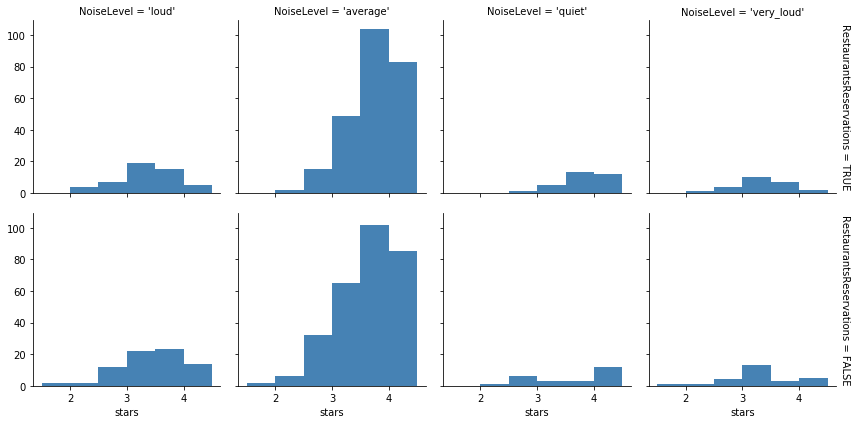

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(LV_bar.loc[(LV_bar["NoiseLevel"]!='unknown')&(LV_bar["RestaurantsReservations"]!='unknown')&(LV_bar["RestaurantsReservations"]!='None'),:], row="RestaurantsReservations", col="NoiseLevel", margin_titles=True)
bins = np.arange(1.5, 5.0, 0.5)
g.map(plt.hist, "stars", color="steelblue", bins=bins)

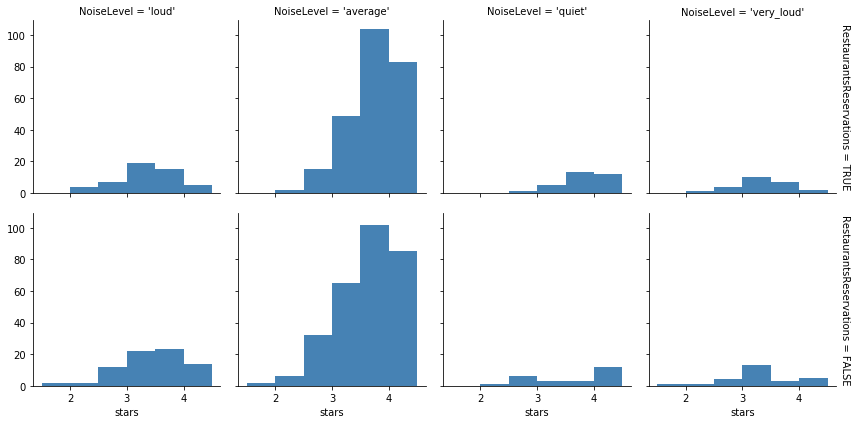

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(LV_bar.loc[(LV_bar["NoiseLevel"]!='unknown')&(LV_bar["RestaurantsReservations"]!='unknown')&(LV_bar["RestaurantsReservations"]!='None'),:], row="RestaurantsReservations", col="NoiseLevel", margin_titles=True)
bins = np.arange(1.5, 5.0, 0.5)
g.map(plt.hist, "stars", color="steelblue", bins=bins)

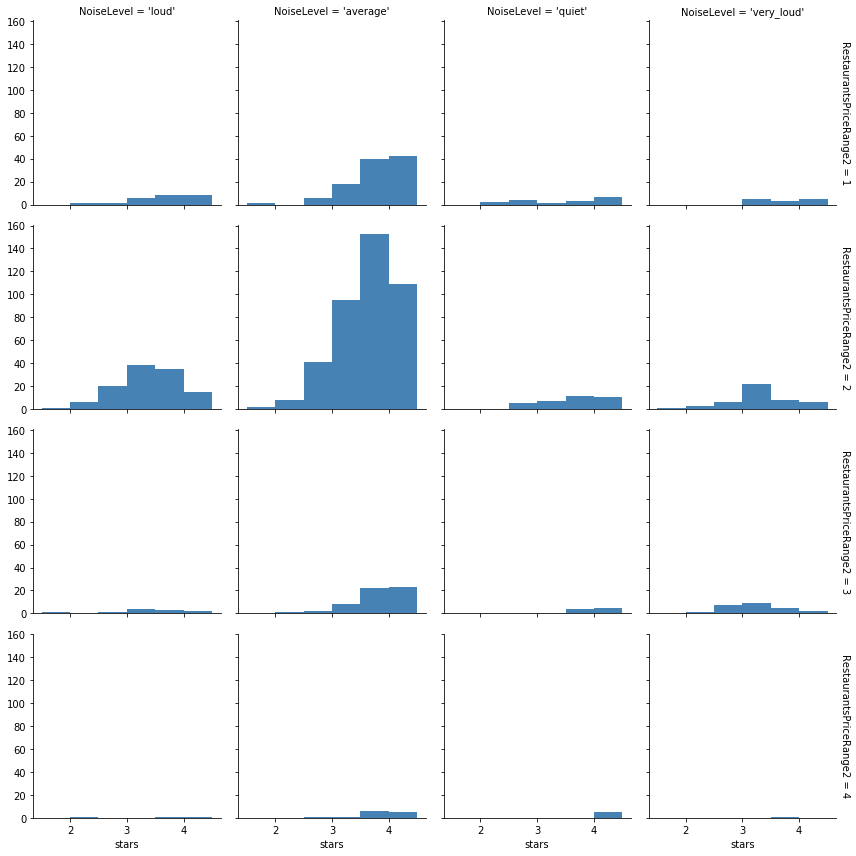

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(LV_bar.loc[(LV_bar["NoiseLevel"]!='unknown')&(LV_bar["RestaurantsPriceRange2"]!='unknown')&(LV_bar["RestaurantsPriceRange2"]!='None'),:], row='RestaurantsPriceRange2', col="NoiseLevel", margin_titles=True)
bins = np.arange(1.5, 5.0, 0.5)
g.map(plt.hist, "stars", color="steelblue", bins=bins)

In [89]:
'''
score_range=[]
count=[0,0,0,0,0,0,0,0]
for i in range(len(LV_bar['stars'])):
    if (LV_bar['stars'][i]<=1.50) & (LV_bar['stars'][i]>=1.00):
        score_range.append('1-1.5')
        count[0]=count[0]+1
    elif (LV_bar['stars'][i]<=2.00) & (LV_bar['stars'][i]>1.50):
        score_range.append('1.5-2')
        count[1]=count[1]+1
    elif (LV_bar['stars'][i]<=2.50) & (LV_bar['stars'][i]>2.00):
        score_range.append('2-2.5')
        count[2]=count[2]+1
    elif (LV_bar['stars'][i]<=3.00) & (LV_bar['stars'][i]>2.50):
        score_range.append('2.5-3')
        count[3]=count[3]+1
    elif (LV_bar['stars'][i]<=3.50) & (LV_bar['stars'][i]>3.00):
        score_range.append('3-3.5')
        count[4]=count[4]+1
    elif (LV_bar['stars'][i]<=4.00) & (LV_bar['stars'][i]>3.50):
        score_range.append('3.5-4')
        count[5]=count[5]+1
    elif (LV_bar['stars'][i]<=4.50) & (LV_bar['stars'][i]>4.00):
        score_range.append('4-4.5')
        count[6]=count[6]+1
    else:
        score_range.append('4.5-5')
        count[7]=count[7]+1
'''

"\nscore_range=[]\ncount=[0,0,0,0,0,0,0,0]\nfor i in range(len(LV_bar['stars'])):\n    if (LV_bar['stars'][i]<=1.50) & (LV_bar['stars'][i]>=1.00):\n        score_range.append('1-1.5')\n        count[0]=count[0]+1\n    elif (LV_bar['stars'][i]<=2.00) & (LV_bar['stars'][i]>1.50):\n        score_range.append('1.5-2')\n        count[1]=count[1]+1\n    elif (LV_bar['stars'][i]<=2.50) & (LV_bar['stars'][i]>2.00):\n        score_range.append('2-2.5')\n        count[2]=count[2]+1\n    elif (LV_bar['stars'][i]<=3.00) & (LV_bar['stars'][i]>2.50):\n        score_range.append('2.5-3')\n        count[3]=count[3]+1\n    elif (LV_bar['stars'][i]<=3.50) & (LV_bar['stars'][i]>3.00):\n        score_range.append('3-3.5')\n        count[4]=count[4]+1\n    elif (LV_bar['stars'][i]<=4.00) & (LV_bar['stars'][i]>3.50):\n        score_range.append('3.5-4')\n        count[5]=count[5]+1\n    elif (LV_bar['stars'][i]<=4.50) & (LV_bar['stars'][i]>4.00):\n        score_range.append('4-4.5')\n        count[6]=count[

In [90]:
time_df['score_range']=score_range

/Users/joyzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
time_df_without_NaN = time_df.dropna(axis = 0)

In [92]:
open_time=[]
for i in range(len(time_df_without_NaN)):
    temp=int(list(time_df_without_NaN['SaturdayOPEN'])[i].split(':')[0])
    if int(list(time_df_without_NaN['SaturdayOPEN'])[i].split(':')[1]) !=0:
        temp=temp+round(float(int(list(time_df_without_NaN['SaturdayOPEN'])[i].split(':')[1])/60),1)
    open_time.append(temp)


In [93]:
'''
open_cate=[]
for i in range(len(open_time)):
    temp = open_time[i]
    if (temp>=18 and temp<22):
        open_cate.append(1)
    elif (temp>=22 and temp<23.99) or (temp>=0 and temp<2):
        open_cate.append(2)
    elif (temp>=2 and temp<6):
        open_cate.append(3)
    elif (temp>=6 and temp<10):
        open_cate.append(4)
    elif (temp>=10 and temp<14):
        open_cate.append(5)
    else:
        open_cate.append(6)
'''    

'\nopen_cate=[]\nfor i in range(len(open_time)):\n    temp = open_time[i]\n    if (temp>=18 and temp<22):\n        open_cate.append(1)\n    elif (temp>=22 and temp<23.99) or (temp>=0 and temp<2):\n        open_cate.append(2)\n    elif (temp>=2 and temp<6):\n        open_cate.append(3)\n    elif (temp>=6 and temp<10):\n        open_cate.append(4)\n    elif (temp>=10 and temp<14):\n        open_cate.append(5)\n    else:\n        open_cate.append(6)\n'

In [94]:

open_cate=[]
for i in range(len(open_time)):
    temp = open_time[i]
    if (temp>=16 and temp<19):
        open_cate.append(1)
    elif (temp>=19 and temp<22):
        open_cate.append(2)
    elif (temp>=22 and temp<23.99) or (temp>=0 and temp<1):
        open_cate.append(3)
    elif (temp>=1 and temp<4):
        open_cate.append(4)
    elif (temp>=4 and temp<7):
        open_cate.append(5)
    elif (temp>=7 and temp<10):
        open_cate.append(6)
    elif (temp>=10 and temp<13):
        open_cate.append(7)
    else:
        open_cate.append(8)


In [95]:
'''
open_cate=[]
for i in range(len(open_time)):
    temp = open_time[i]
    if (temp>=16 and temp<18):
        open_cate.append(1)
    elif (temp>=18 and temp<20):
        open_cate.append(2)
    elif (temp>=20 and temp<22):
        open_cate.append(3)
    elif (temp>=22 and temp<23.99):
        open_cate.append(4)
    elif (temp>=0 and temp<2):
        open_cate.append(5)
    elif (temp>=2 and temp<4):
        open_cate.append(6)
    elif (temp>=4 and temp<6):
        open_cate.append(7)
    elif (temp>=6 and temp<8):
        open_cate.append(8)
    elif (temp>=8 and temp<10):
        open_cate.append(9)
    elif (temp>=10 and temp<12):
        open_cate.append(10)
    elif (temp>=12 and temp<14):
        open_cate.append(11)
    else:
        open_cate.append(12)
'''

'\nopen_cate=[]\nfor i in range(len(open_time)):\n    temp = open_time[i]\n    if (temp>=16 and temp<18):\n        open_cate.append(1)\n    elif (temp>=18 and temp<20):\n        open_cate.append(2)\n    elif (temp>=20 and temp<22):\n        open_cate.append(3)\n    elif (temp>=22 and temp<23.99):\n        open_cate.append(4)\n    elif (temp>=0 and temp<2):\n        open_cate.append(5)\n    elif (temp>=2 and temp<4):\n        open_cate.append(6)\n    elif (temp>=4 and temp<6):\n        open_cate.append(7)\n    elif (temp>=6 and temp<8):\n        open_cate.append(8)\n    elif (temp>=8 and temp<10):\n        open_cate.append(9)\n    elif (temp>=10 and temp<12):\n        open_cate.append(10)\n    elif (temp>=12 and temp<14):\n        open_cate.append(11)\n    else:\n        open_cate.append(12)\n'

In [96]:
close_time=[]
for i in range(len(time_df_without_NaN)):
    temp=int(list(time_df_without_NaN['SaturdayCOLSED'])[i].split(':')[0])
    if int(list(time_df_without_NaN['SaturdayCOLSED'])[i].split(':')[1]) !=0:
        temp=temp+round(float(int(list(time_df_without_NaN['SaturdayCOLSED'])[i].split(':')[1])/60),1)
    close_time.append(temp)

In [97]:
close_cate=[]
for i in range(len(close_time)):
    temp = close_time[i]
    if (temp>=16 and temp<19):
        close_cate.append(1)
    elif (temp>=19 and temp<22):
        close_cate.append(2)
    elif (temp>=22 and temp<23.99) or (temp>=0 and temp<1):
        close_cate.append(3)
    elif (temp>=1 and temp<4):
        close_cate.append(4)
    elif (temp>=4 and temp<7):
        close_cate.append(5)
    elif (temp>=7 and temp<10):
        close_cate.append(6)
    elif (temp>=10 and temp<13):
        close_cate.append(7)
    else:
        close_cate.append(8)    

In [98]:
length=[]
for i in range(len(close_time)):
    temp=close_time[i]-open_time[i]
    if temp <= 0:
        length.append(temp+24)
    else:
        length.append(temp)    


In [99]:
length_cate=[]
for i in range(len(length)):
    temp = length[i]
    if (temp>=0 and temp<2):
        length_cate.append(1)
    elif (temp>=2 and temp<4):
        length_cate.append(2)
    elif (temp>=4 and temp<6):
        length_cate.append(3)
    elif (temp>=6 and temp<8):
        length_cate.append(4)
    elif (temp>=8 and temp<10):
        length_cate.append(5)
    elif (temp>=10 and temp<12):
        length_cate.append(6)
    elif (temp>=12 and temp<14):
        length_cate.append(7)       
    elif (temp>=14 and temp<16):
        length_cate.append(8)
    elif (temp>=16 and temp<18):
        length_cate.append(9)
    elif (temp>=18 and temp<20):
        length_cate.append(10)       
    elif (temp>=20 and temp<22):
        length_cate.append(11)
    else:
        length_cate.append(12)

In [100]:
time_df_without_NaN['open_time']=open_time
time_df_without_NaN['close_time']=close_time
time_df_without_NaN['open_cate']=open_cate
time_df_without_NaN['close_cate']=close_cate
time_df_without_NaN['length']=length

/Users/joyzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/joyzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/joyzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [116]:
time_df_without_NaN.head(10)

,business_id,stars,SaturdayOPEN,SaturdayCOLSED,score_range,open_time,close_time,open_cate,close_cate,length
0,91868,3.890909,19:30,03:00,3-4,19.5,3.0,2,4,7.5
1,143668,4.301587,10:00,21:00,4-5,10.0,21.0,7,2,11.0
3,87650,4.666667,00:00,00:00,4-5,0.0,0.0,3,3,24.0
5,11250,3.785714,09:00,18:00,3-4,9.0,18.0,6,1,9.0
6,185658,4.117021,00:00,00:00,4-5,0.0,0.0,3,3,24.0
10,169759,4.295455,10:00,04:00,4-5,10.0,4.0,7,5,18.0
11,140230,3.333333,22:00,05:00,3-4,22.0,5.0,3,5,7.0
12,175053,3.200000,17:00,05:00,3-4,17.0,5.0,1,5,12.0
13,98471,4.222222,00:00,00:00,4-5,0.0,0.0,3,3,24.0
14,181507,3.600000,04:30,03:00,3-4,4.5,3.0,5,4,22.5


In [102]:
df=time_df_without_NaN.loc[time_df_without_NaN['length']==24.0]
count2=[0,0,0,0,0]
for i in range(len(df)):
    if (list(df['stars'])[i]<=1.0) & (list(df['stars'])[i]>=0.0):
        count2[0]=count2[0]+1
    elif (list(df['stars'])[i]<=2.0) & (list(df['stars'])[i]>1.0):
        count2[1]=count2[1]+1
    elif (list(df['stars'])[i]<=3.0) & (list(df['stars'])[i]>2.0):
        count2[2]=count2[2]+1
    elif (list(df['stars'])[i]<=4.0) & (list(df['stars'])[i]>3.0):
        count2[3]=count2[3]+1
    else:
        count2[4]=count2[4]+1



In [103]:
count2

[0, 4, 34, 184, 79]

In [104]:
for i in range(len(count)):
    print(count2[i]/count[i])

0.0
0.19047619047619047
0.18994413407821228
0.2953451043338684
0.21010638297872342


In [297]:
DataFrame.to_csv(time_df_without_NaN,"time_3hour_2hour.csv",index=False)

In [107]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

In [119]:
formula = 'stars ~ C(open_cate) + C(close_cate) '
model = ols(formula, time_df_without_NaN).fit()
aov_table = anova_lm(model, typ=2)

In [120]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     4.371
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           1.35e-07
Time:                        15:48:05   Log-Likelihood:                -889.78
No. Observations:                 943   AIC:                             1810.
Df Residuals:                     928   BIC:                             1882.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8046      0.156     24.316      0.000       3.498       4.112
C(open_cate)[T.2]     -0.1490      0.117     -1.272      0.204      -0.379       0.081
C(open_cate)[T.3]     -0.3649      0.065     -5.632      0.000      -0.492      -0.238
C(open_cate)[T.4]      0.3545      0.629      0.564      0.573      -0.880       1.589
C(open_cate)[T.5]     -0.0438      0.118     -0.371      0.711      -0.276       0.188
C(open_cate)[T.6]     -0.1399      0.082     -1.700      0.089      -0.301       0.022
C(open_cate)[T.7]     -0.1906      0.062     -3.086      0.002      -0.312      -0.069
C(open_cate)[T.8]      0.0409      0.166      0.247      0.805      -0.285       0.366
C(close_cate)[T.2]     0.4147      0.188      2.202      0.028       0.045       0.784
C(close_cate)[T.3]     0.1742      0.151      1.153      0.249      -0.122       0.471
C(close_cate)[T.4]     0.0722      0.153      0.474      0.636      -0.227       0.372
C(close_cate)[T.5]    -0.1329      0.159     -0.834      0.405      -0.446       0.180
C(close_cate)[T.6]    -0.3407      0.223     -1.530      0.126      -0.778       0.096
C(close_cate)[T.7]     0.0390      0.391      0.100      0.921      -0.728       0.806
C(close_cate)[T.8]    -0.6394      0.654     -0.978      0.328      -1.922       0.643
==============================================================================
Omnibus:                       44.284   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.313
Skew:                          -0.457   Prob(JB):                     5.91e-13
Kurtosis:                       3.773   Cond. No.                         41.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
print(aov_table)

                   sum_sq     df         F    PR(>F)
C(open_cate)    14.048790    7.0  5.110731  0.000010
C(close_cate)   13.900406    7.0  5.056751  0.000012
Residual       364.423075  928.0       NaN       NaN


In [117]:
time_df_without_NaN.head(10)

,business_id,stars,SaturdayOPEN,SaturdayCOLSED,score_range,open_time,close_time,open_cate,close_cate,length
0,91868,3.890909,19:30,03:00,3-4,19.5,3.0,2,4,7.5
1,143668,4.301587,10:00,21:00,4-5,10.0,21.0,7,2,11.0
3,87650,4.666667,00:00,00:00,4-5,0.0,0.0,3,3,24.0
5,11250,3.785714,09:00,18:00,3-4,9.0,18.0,6,1,9.0
6,185658,4.117021,00:00,00:00,4-5,0.0,0.0,3,3,24.0
10,169759,4.295455,10:00,04:00,4-5,10.0,4.0,7,5,18.0
11,140230,3.333333,22:00,05:00,3-4,22.0,5.0,3,5,7.0
12,175053,3.200000,17:00,05:00,3-4,17.0,5.0,1,5,12.0
13,98471,4.222222,00:00,00:00,4-5,0.0,0.0,3,3,24.0
14,181507,3.600000,04:30,03:00,3-4,4.5,3.0,5,4,22.5


In [121]:
formula2 = 'stars ~ C(open_cate) + C(length)'
model2 = ols(formula2, time_df_without_NaN).fit()
aov_table2 = anova_lm(model2, typ=2)

In [122]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.373
Date:                Tue, 26 Mar 2019   Prob (F-statistic):             0.0483
Time:                        15:48:39   Log-Likelihood:                -885.65
No. Observations:                 943   AIC:                             1871.
Df Residuals:                     893   BIC:                             2114.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          3.6929      0.642      5.755      0.000       2.433       4.952
C(open_cate)[T.2]                 -0.1973      0.126     -1.569      0.117      -0.444       0.049
C(open_cate)[T.3]                 -0.3213      0.120     -2.682      0.007      -0.557      -0.086
C(open_cate)[T.4]                  0.3202      0.452      0.709      0.479      -0.566       1.207
C(open_cate)[T.5]                 -0.1723      0.158     -1.091      0.275      -0.482       0.138
C(open_cate)[T.6]                 -0.0366      0.103     -0.358      0.721      -0.238       0.165
C(open_cate)[T.7]                 -0.0929      0.085     -1.088      0.277      -0.260       0.075
C(open_cate)[T.8]                 -0.0099      0.179     -0.055      0.956      -0.361       0.341
C(length)[T.4.0]                   0.5105      0.685      0.746      0.456      -0.833       1.855
C(length)[T.4.5]                   0.2968      0.680      0.437      0.662      -1.037       1.631
C(length)[T.5.0]                   0.1906      0.656      0.291      0.771      -1.097       1.478
C(length)[T.5.5]                   0.1003      0.666      0.151      0.880      -1.206       1.407
C(length)[T.5.800000000000001]    -0.1406      0.904     -0.156      0.876      -1.914       1.633
C(length)[T.6.0]                   0.2538      0.650      0.390      0.696      -1.022       1.530
C(length)[T.6.5]                  -0.0061      0.690     -0.009      0.993      -1.361       1.349
C(length)[T.7.0]                   0.0595      0.651      0.092      0.927      -1.217       1.336
C(length)[T.7.5]                  -0.0637      0.714     -0.089      0.929      -1.465       1.338
C(length)[T.8.0]                   0.1044      0.650      0.161      0.872      -1.171       1.379
C(length)[T.8.5]                   0.0954      0.784      0.122      0.903      -1.443       1.634
C(length)[T.9.0]                   0.2341      0.650      0.360      0.719      -1.041       1.509
C(length)[T.9.5]                   0.2116      0.785      0.269      0.788      -1.330       1.753
C(length)[T.10.0]                  0.2951      0.648      0.456      0.649      -0.976       1.566
C(length)[T.10.5]                  0.3382      0.667      0.507      0.612      -0.971       1.647
C(length)[T.11.0]                  0.1597      0.644      0.248      0.804      -1.104       1.423
C(length)[T.11.5]                  0.0238      0.675      0.035      0.972      -1.300       1.348
C(length)[T.12.0]                  0.1716      0.642      0.267      0.789      -1.088       1.431
C(length)[T.12.5]                  0.0950      0.671      0.142      0.887      -1.221       1.412
C(length)[T.12.8]                  0.7704      0.899      0.856      0.392      -0.995       2.536
C(length)[T.13

In [123]:
print(aov_table2)

                  sum_sq     df         F    PR(>F)
C(open_cate)    4.624460    7.0  1.633110  0.122452
C(length)      17.283081   43.0  0.993585  0.484903
Residual      361.242680  893.0       NaN       NaN


In [133]:
'''
fig=interaction_plot(time_df_without_NaN['open_cate'], time_df_without_NaN['length'], time_df_without_NaN['stars'],
             colors=['red','blue'], markers=['D','^'], ms=10)
'''

"\nfig=interaction_plot(time_df_without_NaN['open_cate'], time_df_without_NaN['length'], time_df_without_NaN['stars'],\n             colors=['red','blue'], markers=['D','^'], ms=10)\n"

In [134]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [135]:
figsize(14, 10) 
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300

In [136]:
Label_Com=['1-2','2-3','3-4','4-5']

In [137]:
#colors = ['wheat','lightsage','cornflowerblue','pink','lightsalmon','sage','mediumpurple','indianred']
colors = ['darkolivegreen','lightsalmon','mediumpurple','darkred']

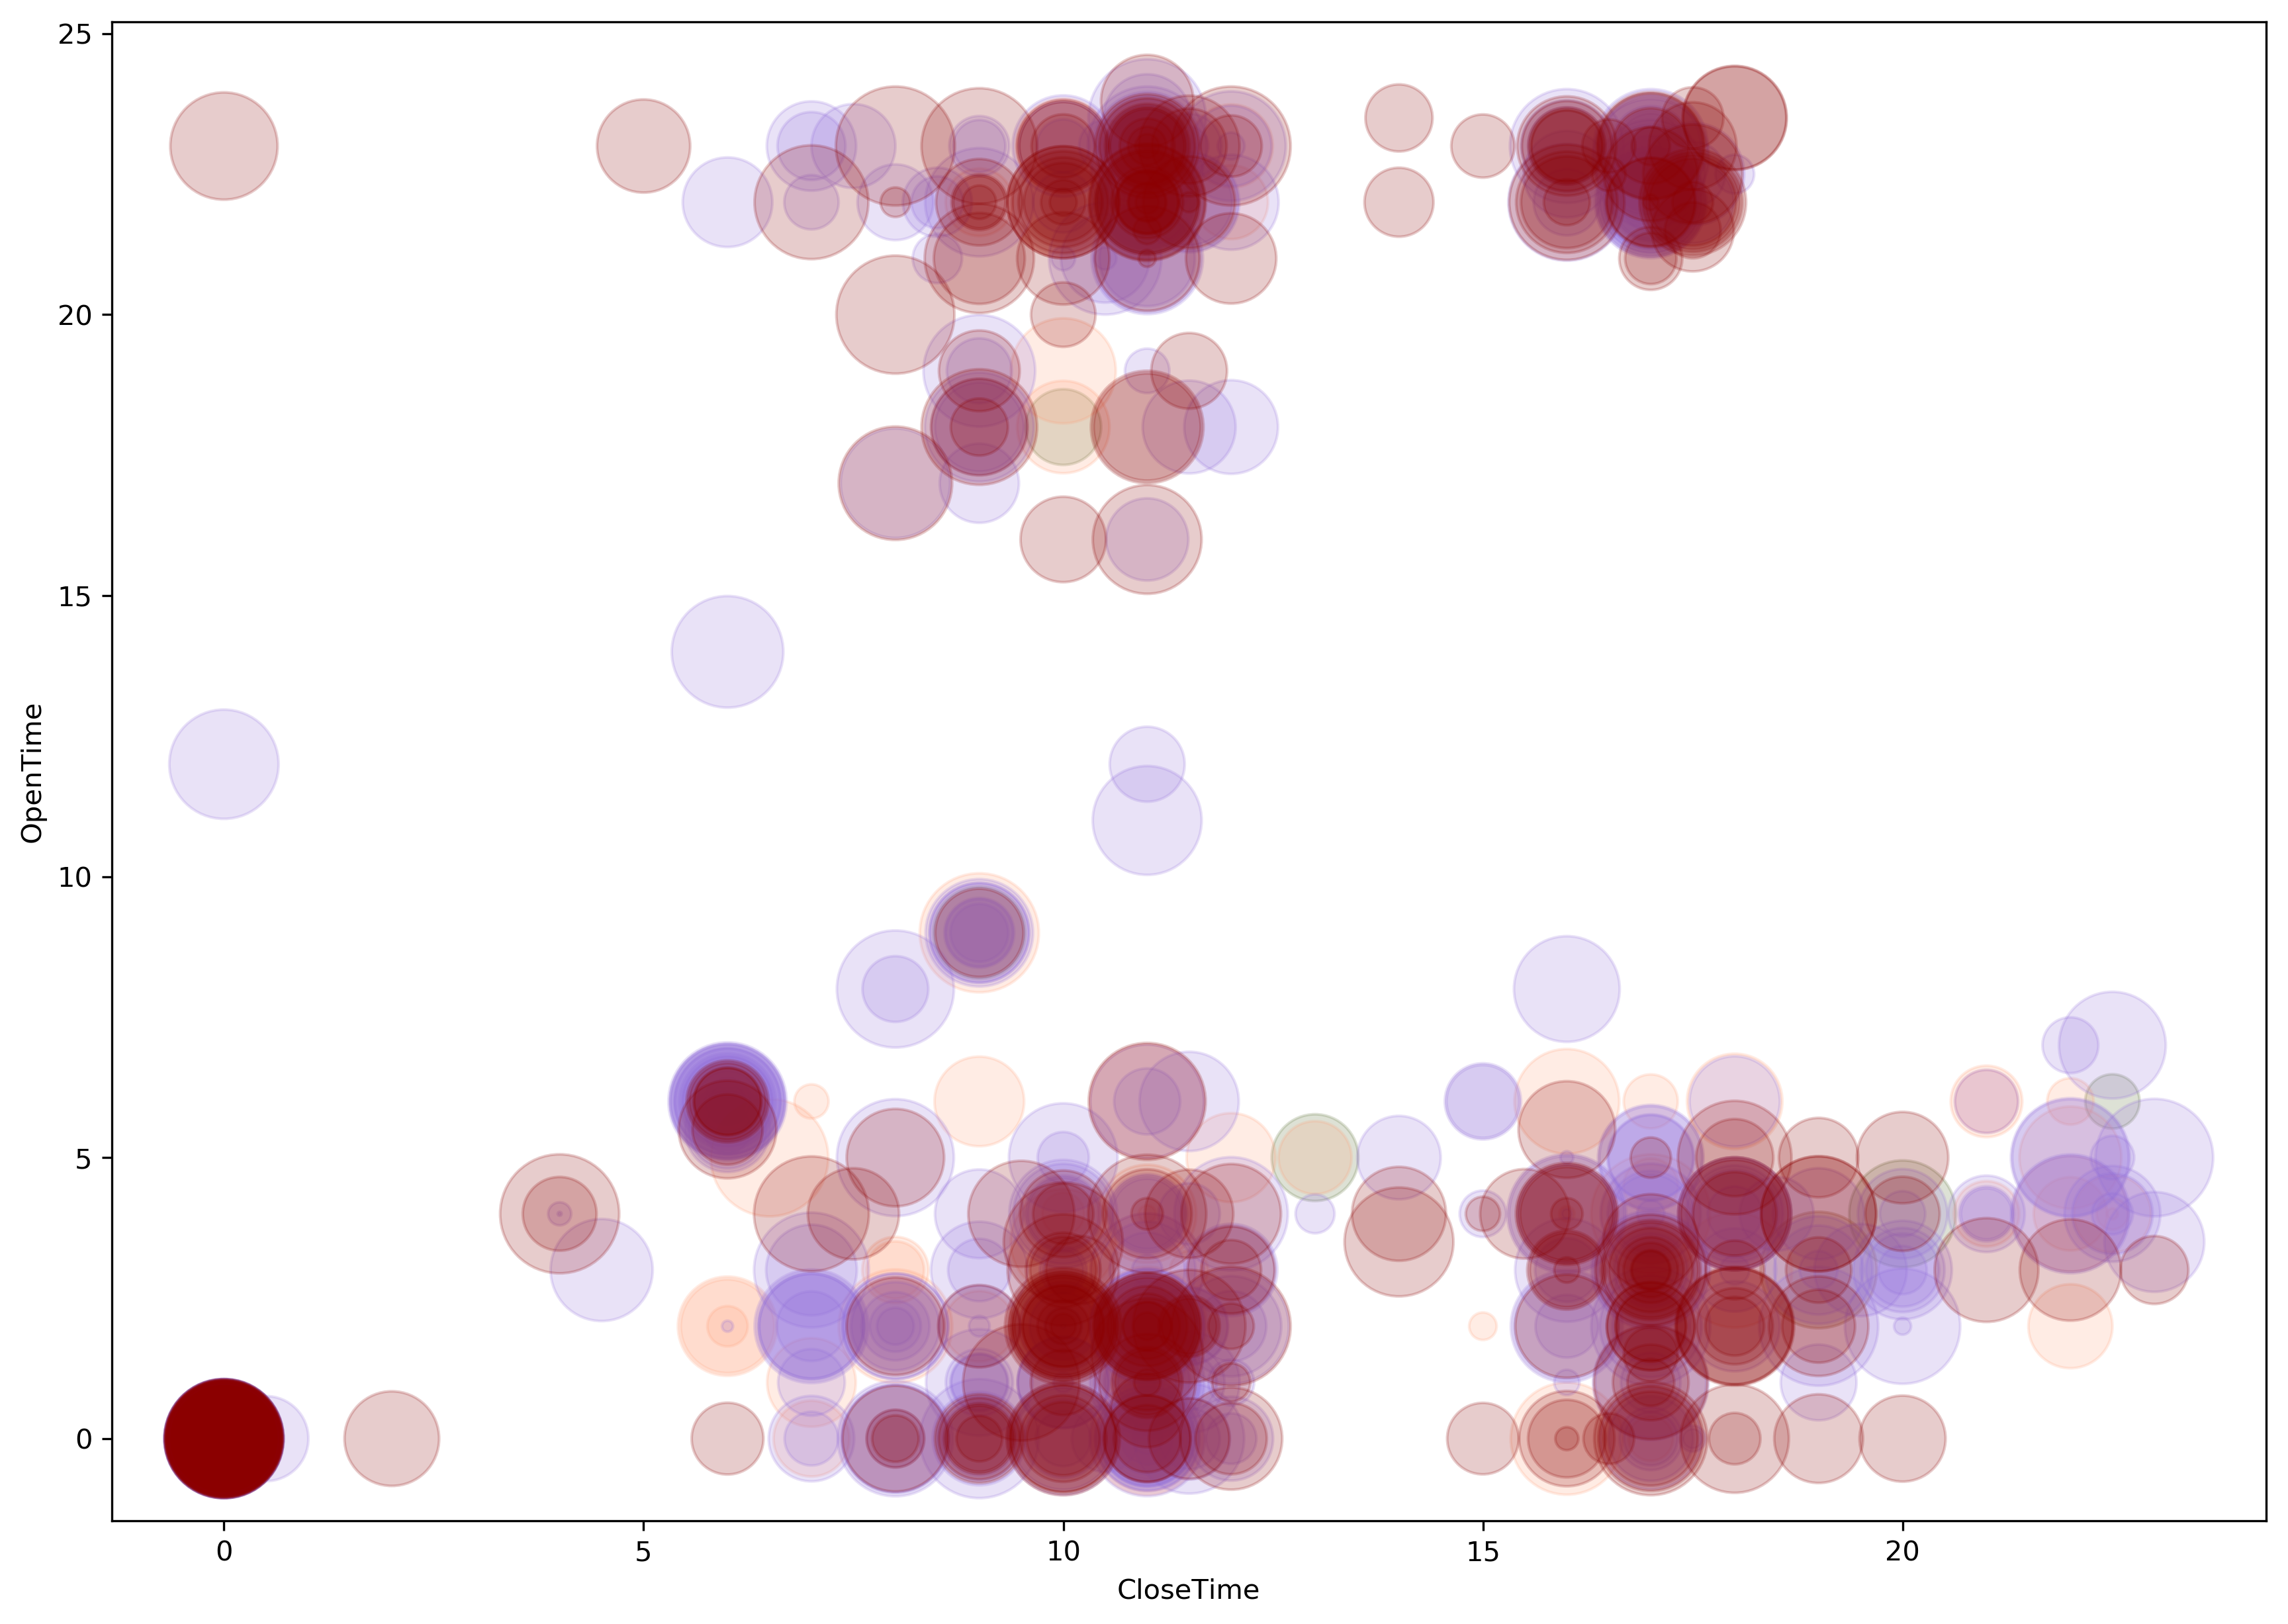

In [141]:
size=time_df_without_NaN['stars'].rank()
for index in range(len(Label_Com)):
    open_time = time_df_without_NaN.loc[time_df_without_NaN['score_range'] == Label_Com[index]]['open_time']
    length = time_df_without_NaN.loc[time_df_without_NaN['score_range'] == Label_Com[index]]['close_time']
    plt.scatter(open_time, length, c=colors[index], s=2*size, alpha=0.2)  

    
plt.xlabel('CloseTime')
plt.ylabel('OpenTime')

#handles,labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels = Label_Com, loc='upper right')
plt.show()

In [142]:
temp=time_df_without_NaN.loc[time_df_without_NaN['length']!=24]

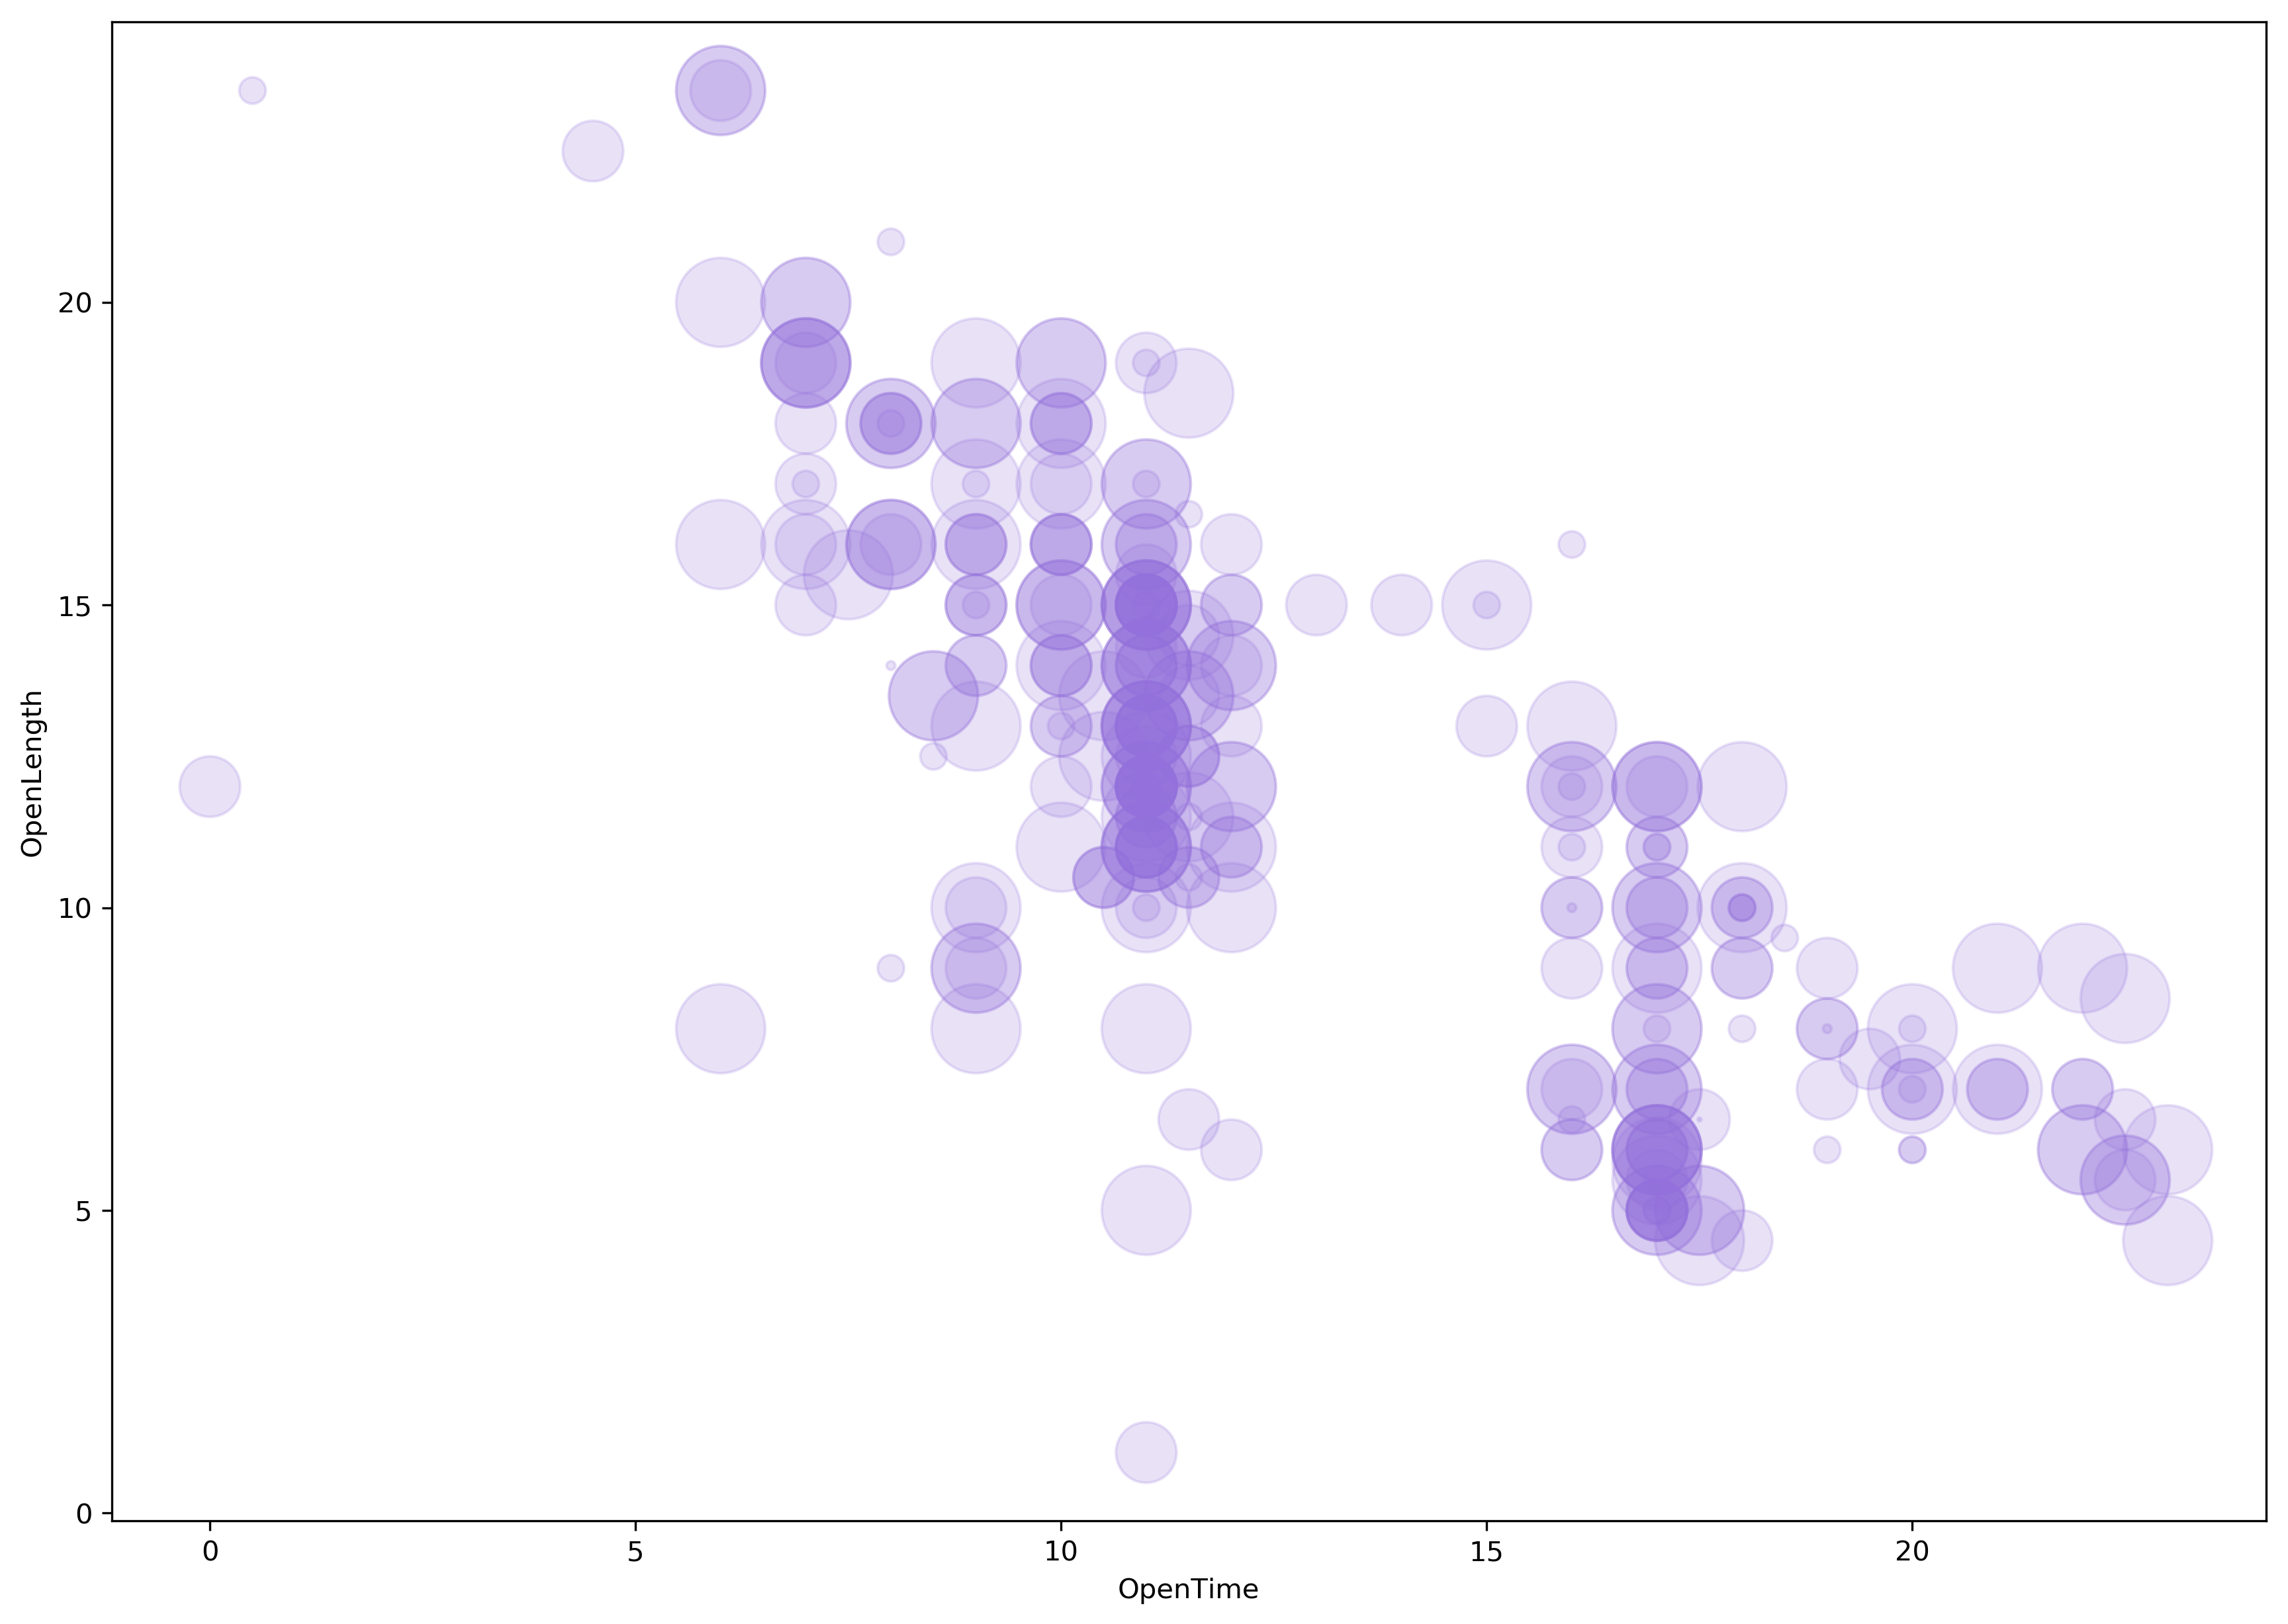

In [146]:
figsize(14, 10) 
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300
size=temp['score_range'].rank()
for index in range(2,3):
    open_time = temp.loc[temp['score_range'] == Label_Com[index]]['open_time']
    length = temp.loc[temp['score_range'] == Label_Com[index]]['length']
    plt.scatter(open_time, length, c=colors[index], s=2*size, alpha=0.2)  

    
plt.xlabel('OpenTime')
plt.ylabel('OpenLength')

#handles,labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels = Label_Com, loc='upper right')
plt.show()

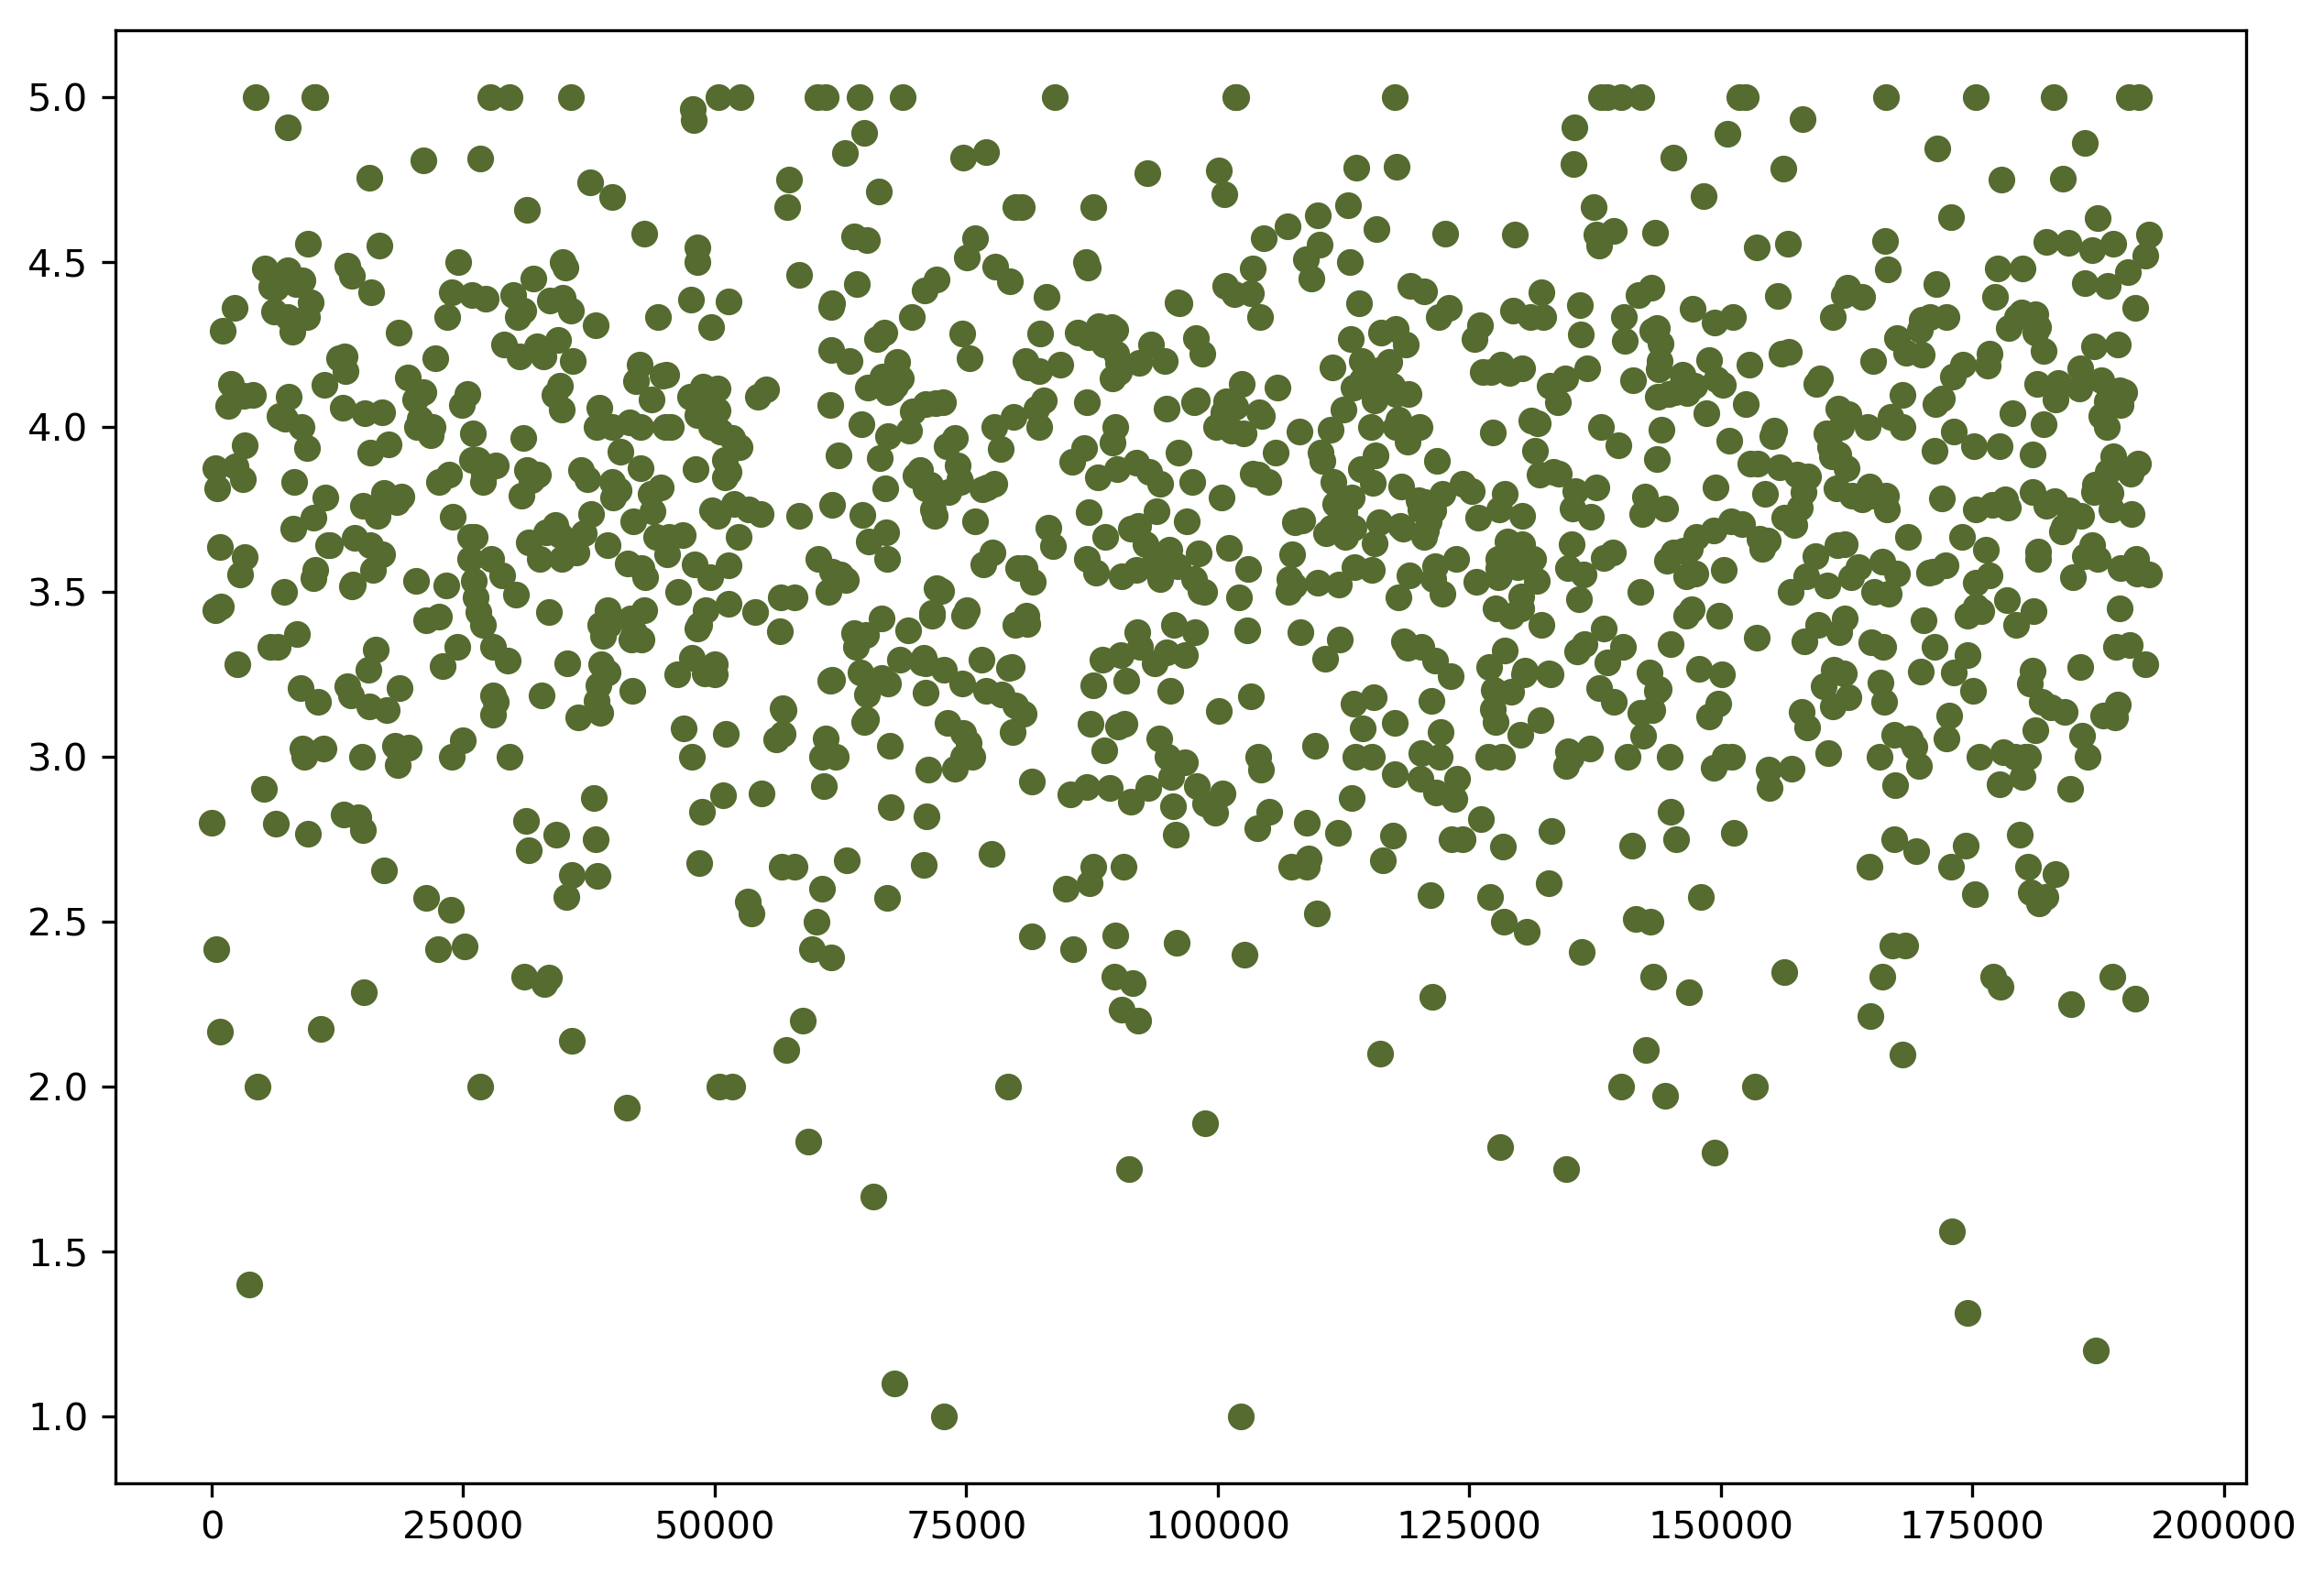

In [148]:
f, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x=LV_bar['business_id'], y=LV_bar['stars'], c='darkolivegreen')
plt.show()

In [150]:
'''
plt.figure(figsize=(8, 5), dpi=80)

plt.bar(range(1,6), count,label="Star Dist", color="#a50055")

plt.xlabel('Star Range')
plt.ylabel('Count')
plt.legend(loc="upper right")
'''

'\nplt.figure(figsize=(8, 5), dpi=80)\n\nplt.bar(range(1,6), count,label="Star Dist", color="#a50055")\n\nplt.xlabel(\'Star Range\')\nplt.ylabel(\'Count\')\nplt.legend(loc="upper right")\n'

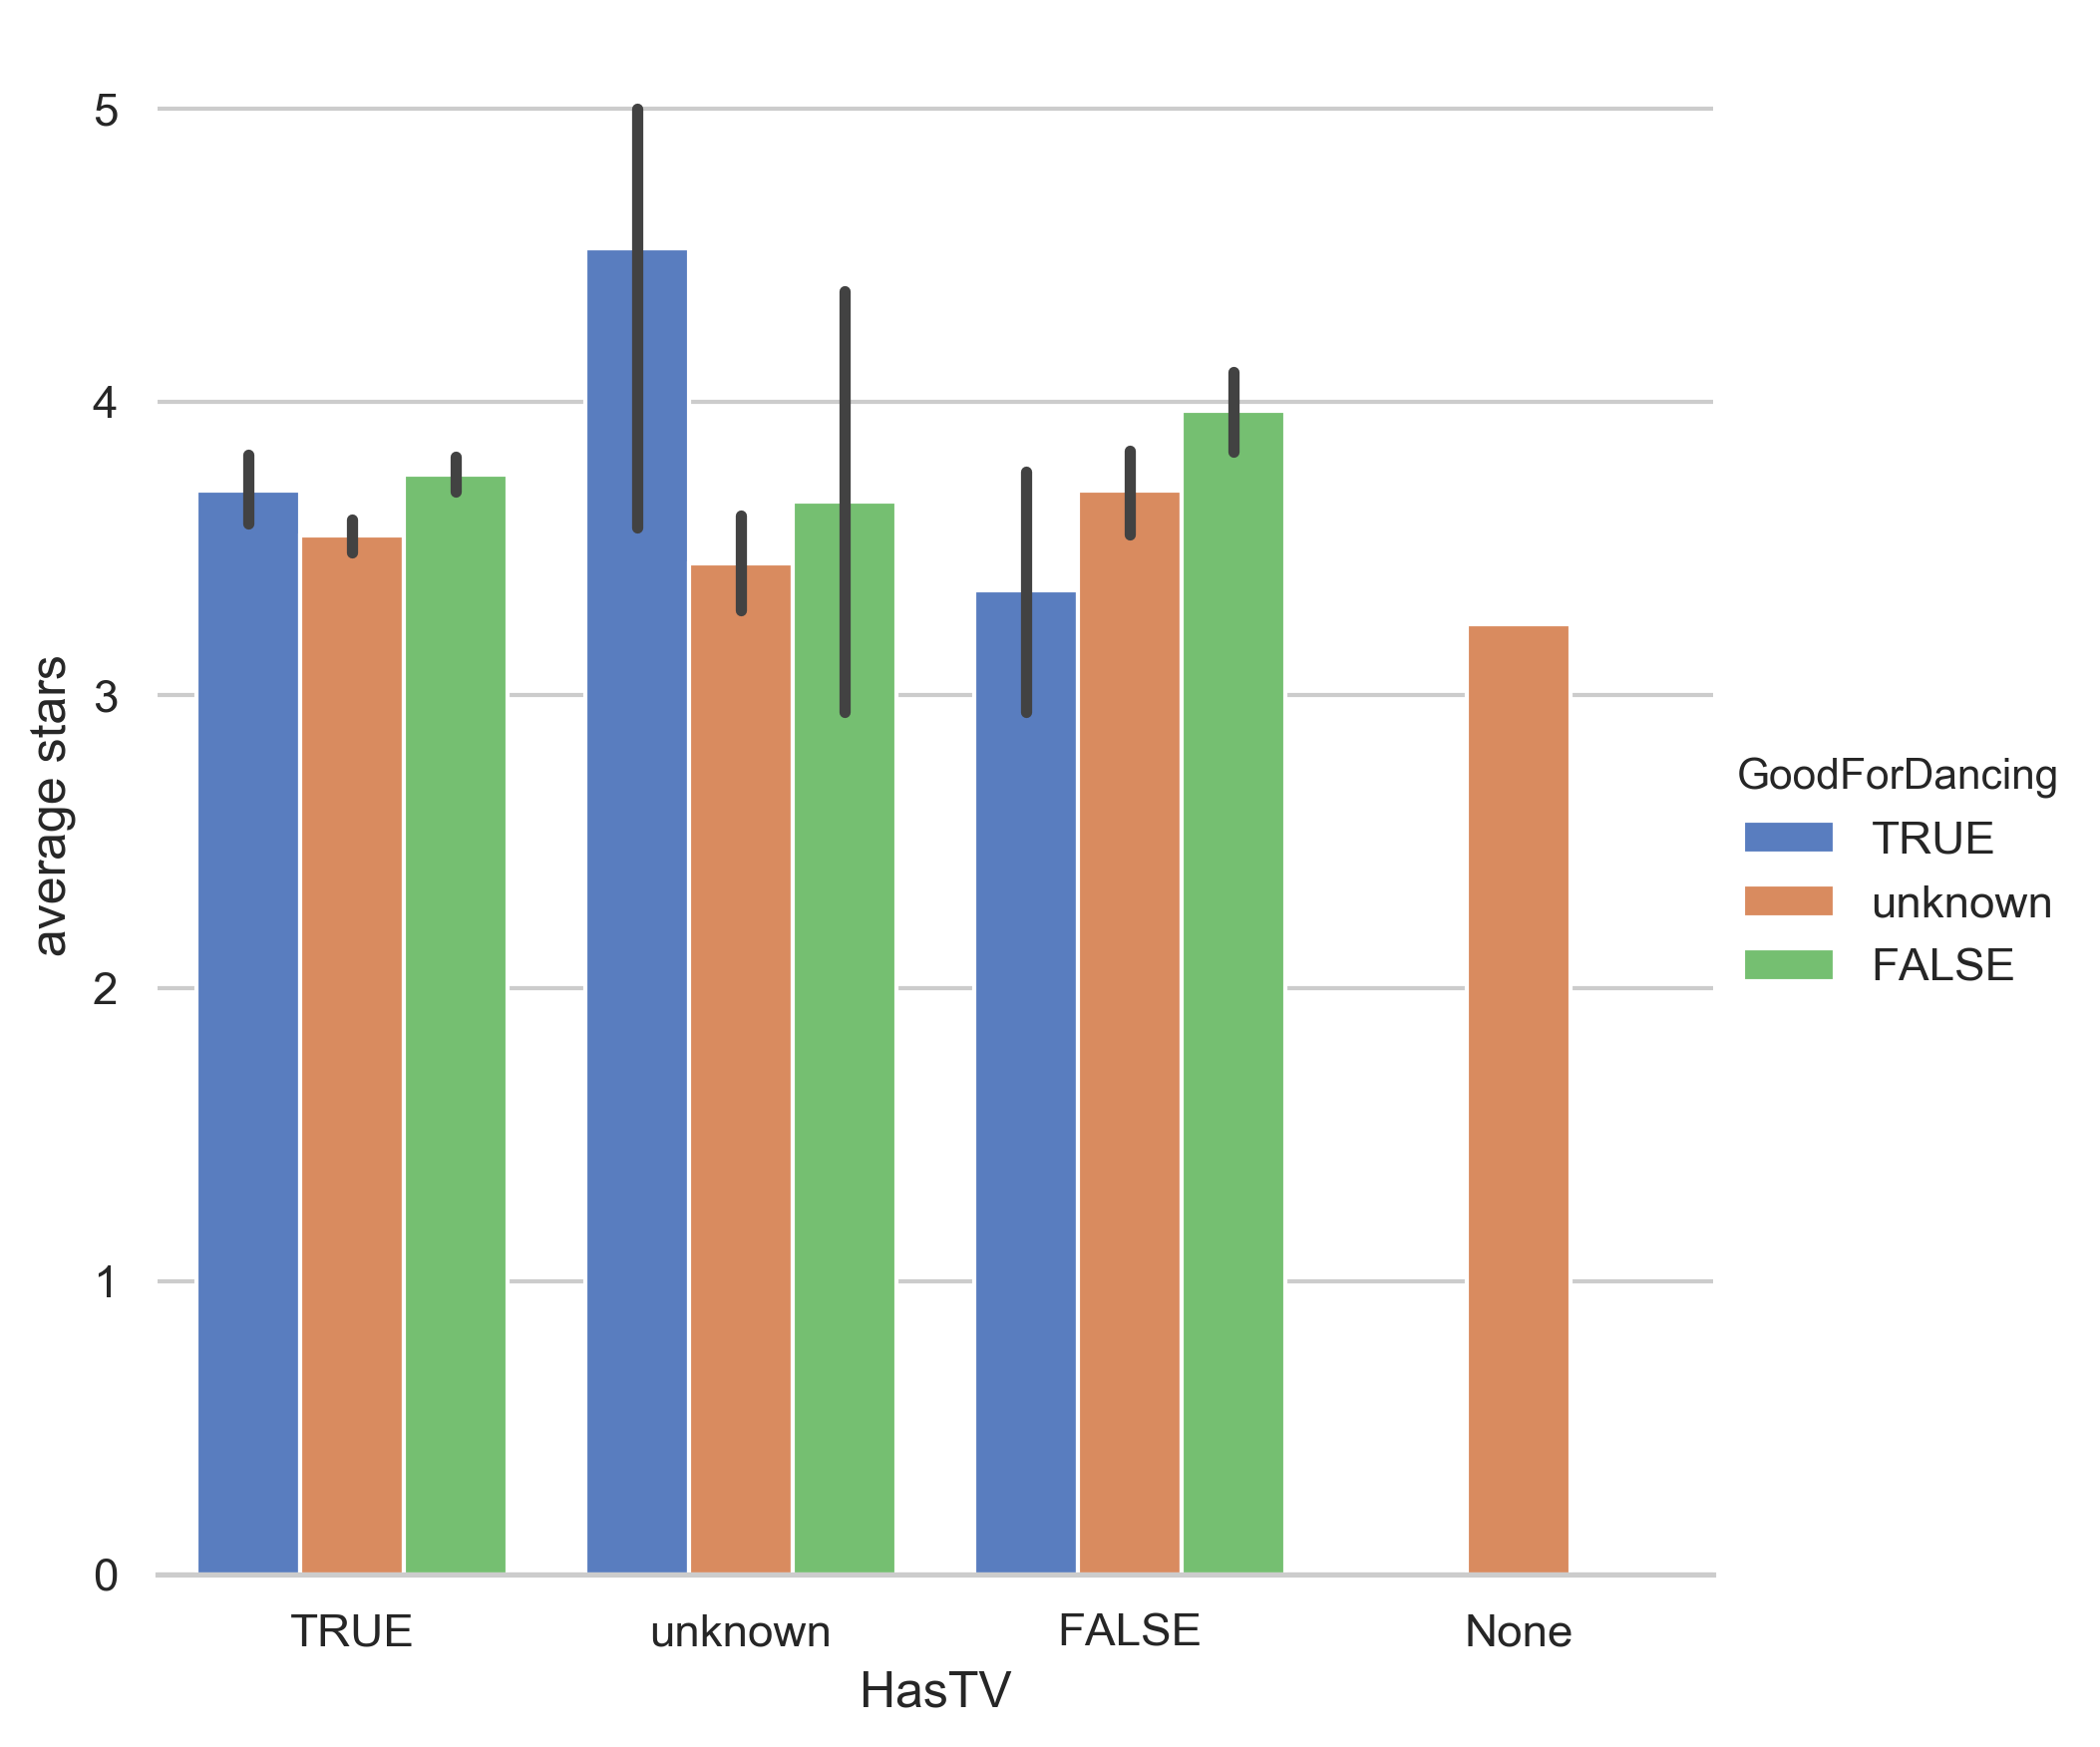

In [154]:
figsize(8, 6) 
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300

sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x='HasTV', y="stars", hue='GoodForDancing', data=LV_bar,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("average stars")

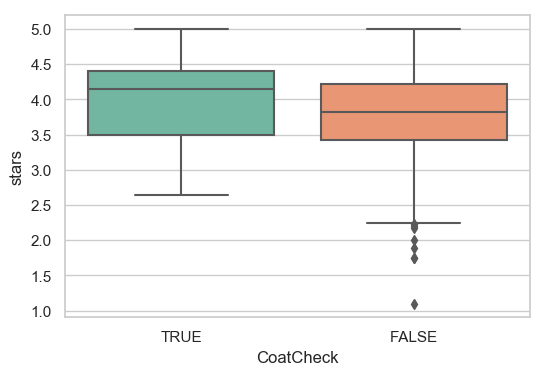

In [156]:
figsize(6, 4) 
plt.rcParams['savefig.dpi'] = 100 
plt.rcParams['figure.dpi'] = 100
sns.boxplot(data=LV_bar.loc[LV_bar['CoatCheck']!='unknown',:],x='CoatCheck',y='stars',palette="Set2")

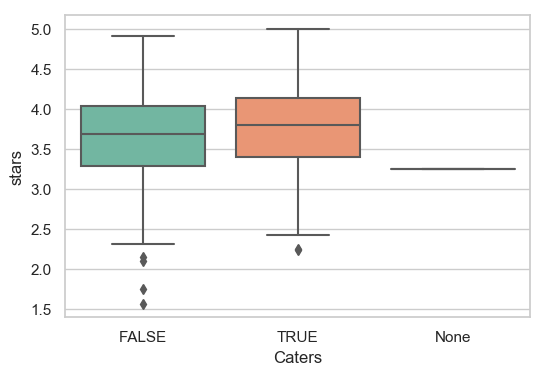

In [157]:
figsize(6, 4) 
plt.rcParams['savefig.dpi'] = 100 
plt.rcParams['figure.dpi'] = 100
sns.boxplot(data=LV_bar.loc[LV_bar['Caters']!='unknown',:],x='Caters',y='stars',palette="Set2")

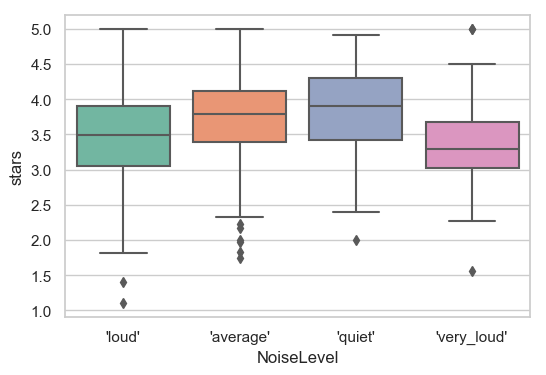

In [158]:
figsize(6, 4) 
plt.rcParams['savefig.dpi'] = 100 
plt.rcParams['figure.dpi'] = 100
sns.boxplot(data=LV_bar.loc[LV_bar['NoiseLevel']!='unknown',:],x='NoiseLevel',y='stars',palette="Set2")

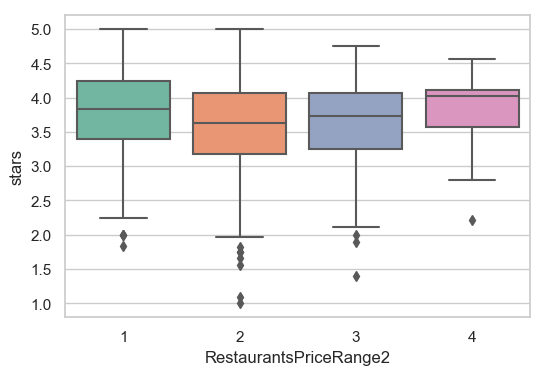

In [159]:
sns.boxplot(data=LV_bar.loc[(LV_bar['RestaurantsPriceRange2']!='unknown')&(LV_bar['RestaurantsPriceRange2']!='None'),:],x='RestaurantsPriceRange2',y='stars',palette="Set2")

In [160]:
LV_bar.loc[(LV_bar['Alcohol']=="'full_bar'")|(LV_bar['Alcohol']=="'beer_and_wine'"),:].head(10)

,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,...,TuesdayOPEN,WednesdayOPEN,FridayCOLSED,MondayCOLSED,SaturdayCOLSED,SundayCOLSED,ThursdayCOLSED,TuesdayCOLSED,WednesdayCOLSED,stars
0,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,FALSE,unknown,TRUE,...,NaN,NaN,03:00,NaN,03:00,02:00,02:00,NaN,NaN,3.890909
1,unknown,unknown,'beer_and_wine',unknown,unknown,unknown,unknown,TRUE,unknown,TRUE,...,10:00,10:00,21:00,21:00,21:00,20:00,21:00,21:00,21:00,4.301587
6,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,FALSE,unknown,TRUE,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,4.117021
7,unknown,unknown,'full_bar',None,unknown,unknown,unknown,TRUE,unknown,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.375000
8,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,TRUE,unknown,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.136364
9,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,TRUE,unknown,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
10,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,FALSE,unknown,TRUE,...,10:00,10:00,04:00,03:00,04:00,03:00,04:00,03:00,03:00,4.295455
11,unknown,'21plus','full_bar',unknown,unknown,unknown,unknown,TRUE,unknown,TRUE,...,NaN,22:00,04:00,NaN,05:00,06:00,05:00,NaN,06:00,3.333333
16,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,TRUE,FALSE,TRUE,...,17:00,17:00,04:00,07:00,03:30,02:30,04:30,02:30,02:30,4.407942
17,unknown,unknown,'beer_and_wine',unknown,unknown,unknown,unknown,FALSE,FALSE,TRUE,...,11:30,11:30,23:30,23:30,23:30,23:30,23:30,23:30,23:30,4.243902


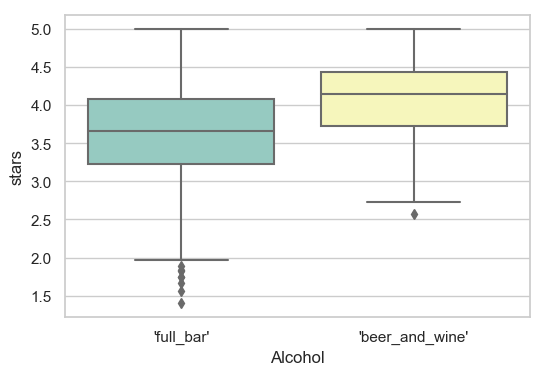

In [161]:
sns.boxplot(data=LV_bar.loc[(LV_bar['Alcohol']=="'full_bar'")|(LV_bar['Alcohol']=="'beer_and_wine'"),:],x='Alcohol',y='stars',palette="Set3")

In [162]:
import scipy.stats as st 
d1 = LV_bar.loc[LV_bar['RestaurantsPriceRange2']=="1",:]['stars']
d2 = LV_bar.loc[LV_bar['RestaurantsPriceRange2']=="2",:]['stars']
d3 = LV_bar.loc[LV_bar['RestaurantsPriceRange2']=="3",:]['stars']
d4 = LV_bar.loc[LV_bar['RestaurantsPriceRange2']=="4",:]['stars']
args = [d1,d2,d3,d4]
f,p = st.f_oneway(*args)
print(f,p)

5.244128261817611 0.0013497623430132539


In [164]:
LV_bar.loc[LV_bar['RestaurantsPriceRange2']=="1",:].head(10)

,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,...,TuesdayOPEN,WednesdayOPEN,FridayCOLSED,MondayCOLSED,SaturdayCOLSED,SundayCOLSED,ThursdayCOLSED,TuesdayCOLSED,WednesdayCOLSED,stars
1,unknown,unknown,'beer_and_wine',unknown,unknown,unknown,unknown,TRUE,unknown,TRUE,...,10:00,10:00,21:00,21:00,21:00,20:00,21:00,21:00,21:00,4.301587
7,unknown,unknown,'full_bar',None,unknown,unknown,unknown,TRUE,unknown,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.375000
19,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,TRUE,unknown,TRUE,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,3.685185
20,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,FALSE,FALSE,TRUE,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,3.217391
23,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,TRUE,unknown,TRUE,...,06:00,06:00,06:00,06:00,06:00,06:00,06:00,06:00,06:00,3.818182
40,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,FALSE,unknown,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.160000
60,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,FALSE,FALSE,TRUE,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,4.428571
61,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,FALSE,FALSE,TRUE,...,11:00,11:00,22:00,19:00,22:00,19:00,22:00,19:00,22:00,5.000000
82,unknown,'21plus','full_bar',unknown,unknown,unknown,unknown,TRUE,unknown,TRUE,...,NaN,23:00,05:00,05:00,05:00,05:00,05:00,NaN,05:00,2.250000
85,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,unknown,unknown,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.400000


In [165]:
import scipy.stats as st 
d1 = LV_bar.loc[LV_bar['CoatCheck']=='TRUE',:]['stars']
d2 = LV_bar.loc[LV_bar['CoatCheck']=='FALSE',:]['stars']
args = [d1,d2]
f,p = st.f_oneway(*args)
print(f,p)

3.5239206881442255 0.061211344435647984


In [166]:
'''
sns.pairplot(LV_bar, vars=['GoodForDancing','latenight'],color = ['b', 'r'])
'''

"\nsns.pairplot(LV_bar, vars=['GoodForDancing','latenight'],color = ['b', 'r'])\n"

In [167]:
'''
from pymongo import MongoClient
import pandas as pd
import folium
from IPython.display import HTML
client = MongoClient("localhost",27017)

db = client.Desktop
collection1 =db.yelp_restaurant_Las_Vegas
reviews=pd.DataFrame(list(collection1.find()))


mapi_osm = folium.Map(location=())
reviews.apply(lambda row:folium.CircleMarker(location[row["latitude"],row["longitude"]]).add_to(mapi_osm),axis=1)

mapi_osm.save('spst.html')
'''

'\nfrom pymongo import MongoClient\nimport pandas as pd\nimport folium\nfrom IPython.display import HTML\nclient = MongoClient("localhost",27017)\n\ndb = client.Desktop\ncollection1 =db.yelp_restaurant_Las_Vegas\nreviews=pd.DataFrame(list(collection1.find()))\n\n\nmapi_osm = folium.Map(location=())\nreviews.apply(lambda row:folium.CircleMarker(location[row["latitude"],row["longitude"]]).add_to(mapi_osm),axis=1)\n\nmapi_osm.save(\'spst.html\')\n'

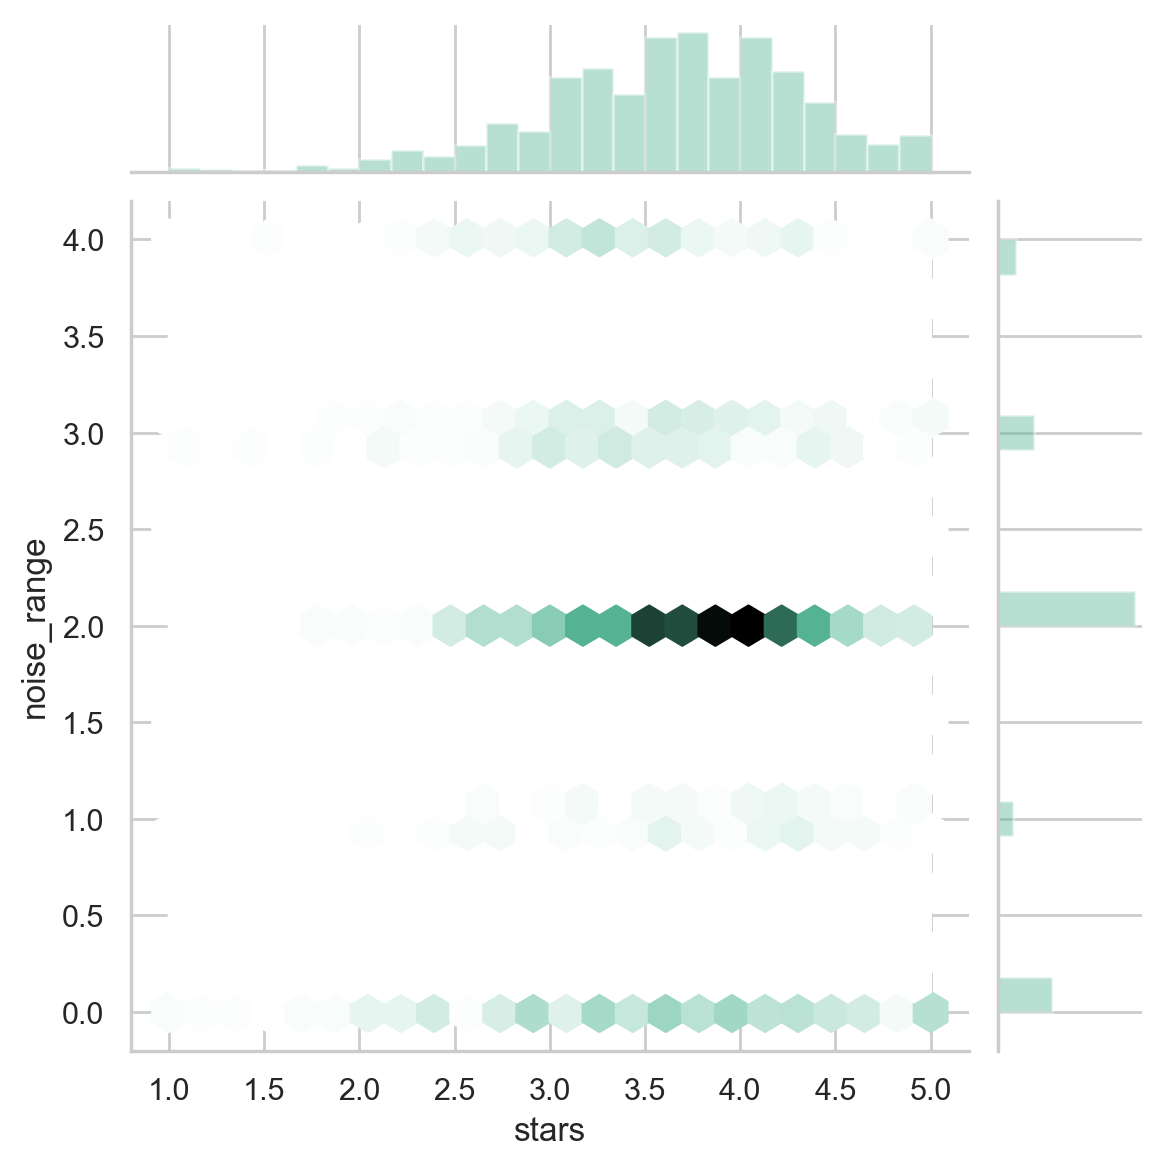

In [169]:
figsize(10, 7) 
plt.rcParams['savefig.dpi'] = 200 
plt.rcParams['figure.dpi'] = 200

noise_range=[]
count=[0,0,0,0,0]
for i in range(len(LV_bar['stars'])):
    if (LV_bar['NoiseLevel'][i] == "'loud'"):
        noise_range.append(3)
        count[2]=count[2]+1
    elif (LV_bar['NoiseLevel'][i] == "'average'"):
        noise_range.append(2)
        count[1]=count[1]+1
    elif (LV_bar['NoiseLevel'][i] == "'quiet'"):
        noise_range.append(1)
        count[0]=count[0]+1
    elif (LV_bar['NoiseLevel'][i] == "'very_loud'"):
        noise_range.append(4)
        count[4]=count[4]+1
    else:
        noise_range.append(0)
        count[3]=count[3]+1
        
LV_bar['noise_range'] = noise_range
x = LV_bar['stars']
y = LV_bar['noise_range']

sns.jointplot(x, y, kind="hex", color="#4CB391")

# 0325

In [171]:
LV_bar.head(10)

,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,...,WednesdayOPEN,FridayCOLSED,MondayCOLSED,SaturdayCOLSED,SundayCOLSED,ThursdayCOLSED,TuesdayCOLSED,WednesdayCOLSED,stars,noise_range
0,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,FALSE,unknown,TRUE,...,NaN,03:00,NaN,03:00,02:00,02:00,NaN,NaN,3.890909,3
1,unknown,unknown,'beer_and_wine',unknown,unknown,unknown,unknown,TRUE,unknown,TRUE,...,10:00,21:00,21:00,21:00,20:00,21:00,21:00,21:00,4.301587,2
2,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.666667,0
3,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,TRUE,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,4.666667,0
4,unknown,unknown,unknown,unknown,unknown,unknown,unknown,FALSE,unknown,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.312500,0
5,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,TRUE,...,09:00,18:00,18:00,18:00,NaN,18:00,18:00,18:00,3.785714,0
6,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,FALSE,unknown,TRUE,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,4.117021,3
7,unknown,unknown,'full_bar',None,unknown,unknown,unknown,TRUE,unknown,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.375000,2
8,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,TRUE,unknown,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.136364,3
9,unknown,unknown,'full_bar',unknown,unknown,unknown,unknown,TRUE,unknown,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3
